# Classifying Different Kinds of Galaxys - CNNs


Teqniques utilized:

    -Python/Keras/TensorFlow
    -Convolutional Neural Networks
    -Preparing Data
    -Visualization
    -Plotting Results
    

# Introduction

I wanted to put what I learned through my class and implement my own project in which I will utilize Galaxy Zoo (GZ) Data Release 2 where they released a dataset called Galaxy10 which contains ~22k images of galaxies and categorized in 10 broad classes. 

The dataset can be downloaded here: https://astronn.readthedocs.io/en/latest/galaxy10.html (you can read about the dataset) or by clicking this link it will download right away: https://astro.utoronto.ca/~hleung/shared/Galaxy10/Galaxy10_DECals.h5 (no it is not a virus I promise)

NOTE: astroNN does have their own documentation to start a neural network utilizing their library which could be found here: https://github.com/henrysky/astroNN
However, I will be utilizing a Convolutional Nerual Network for predictions

# Preparing Data


In order to begin, we first have to grab important libraries to look at the data and to put this data set to use

In [1]:
#import tools needed
import numpy as np
import h5py
import keras
import matplotlib.image as mpl
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

#tools added
from tensorflow.keras import utils
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.datasets import *
from keras.losses import *
from keras.optimizers import *
from keras.utils import *
from tensorflow.keras.utils import to_categorical
from os import listdir

%config InlineBackend.figure_format = 'retina'


In [2]:
#See what we have in our folder:
listdir('.')


['.ipynb_checkpoints', 'Galaxy-Classification.ipynb', 'Galaxy10_DECals.h5']

# Visualization


As we can see, we have the file of all the images! Now we can begin.

Here im gonna use the provided information on the website to get the images and label them from the file

In [3]:
#grabbing the images and the lables from the file
with h5py.File('Galaxy10_DECals.h5', 'r') as F:
    images = np.array(F['images'])
    labels = np.array(F['ans'])
    

This is here just to check the shape of the dataset

In [4]:
#checking dataset shape
print(images.shape)
print(labels.shape)

(17736, 256, 256, 3)
(17736,)


What I am doing here is labeling the 10 different classes In order to get a visual of how the images should look like.

In [5]:
GalaxyClasses = {0: "Disturbed",
                 1: "Merging",
                 2: "Round Smooth",
                 3: "In-Between Round Smooth",
                 4: "Cigar Round Smooth",
                 5: "Barred Spiral",
                 6: "Unbarred Tight Spiral",
                 7: "Unbarred Loose Spiral",
                 8: "Edge-on without Bulge",
                 9: "Edge-on with Bulge"}

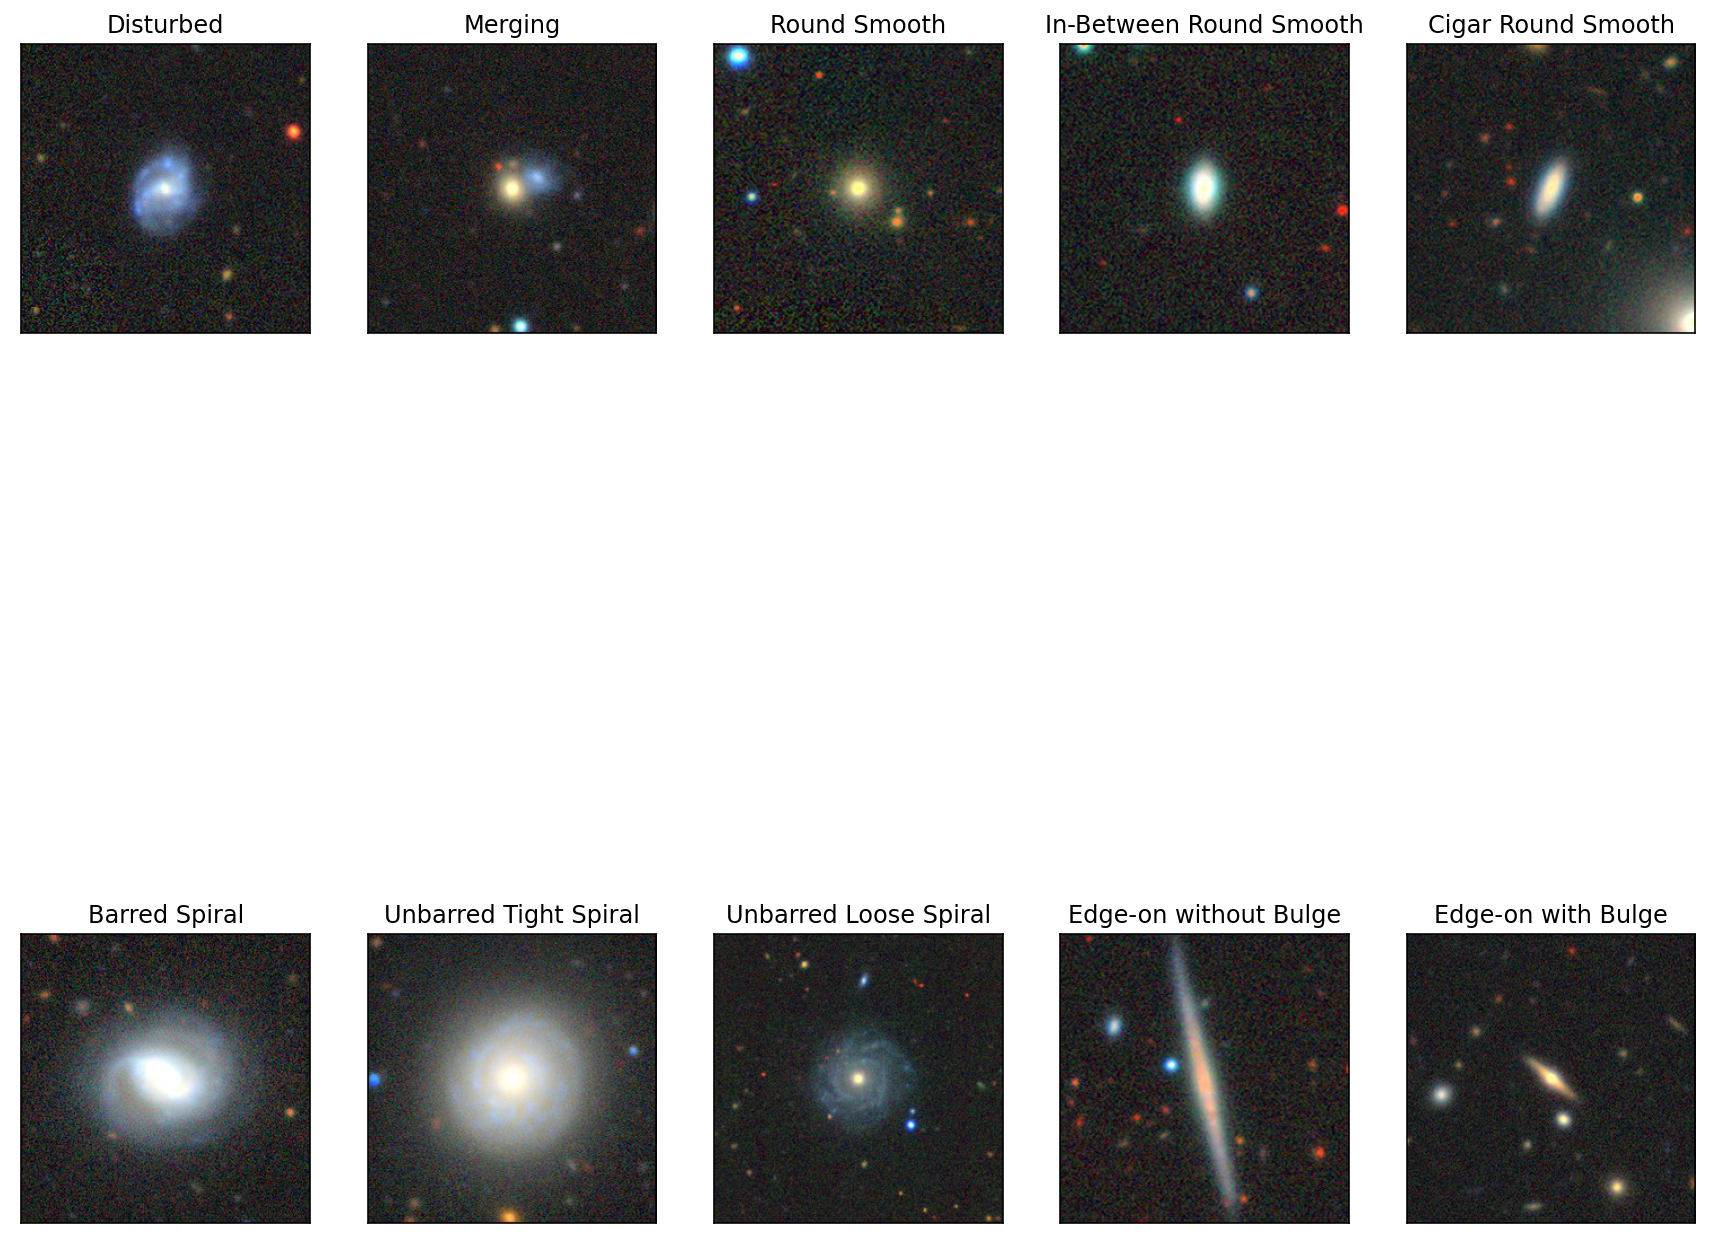

In [6]:
#Visualizing Images
nrows = 2
ncols = 5
figure, ax = plt.subplots(nrows, ncols, figsize = (ncols*3, ncols*3))

count = 0
for i in range(nrows):
    for j in range(ncols):
        axs = ax[i][j]
        location_class = np.where(labels == count)[0]
        location = np.random.choice(location_class)
        #converting to desirable type
        im = images[location].astype(int)
        axs.imshow(im)
        axs.set_title(GalaxyClasses[labels[location]])
        axs.set_xticks([])
        axs.set_yticks([])
        count += 1

# One Hot Encoding

What is One Hot Encoding?

    -its the process in which categorical varibales are converted into a form that helps algorithms do better in prediction (which is important if we want our predictions to be correct)
    
For this data, we convert the labels to categorical classes
    
    (this was also provided on the the site: https://astronn.readthedocs.io/en/latest/galaxy10.html)


In [7]:
#converting the labels to categorical 10 classes
labels = to_categorical(labels, 10)

print(labels.shape)
print(labels[0,:])

(17736, 10)
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


# Splitting Data

Here we will split the data into the training set and the test set


(explain what this is about)

since the splitting of the data was provided on the website we will be using that as well

In [8]:
train_galaxyset, test_galaxyset = train_test_split(np.arange(labels.shape[0]), test_size=0.1)
train_images, train_labels, test_images, test_labels = images[train_galaxyset], labels[train_galaxyset], images[test_galaxyset], labels[test_galaxyset]

# Normalization 

In [9]:
### Dividing all image pixel values by the maximum, also called as normalization
train_images = train_images/255
test_images = test_images/255
print(train_images.shape)
print(test_images.shape)

(15962, 256, 256, 3)
(1774, 256, 256, 3)


# Building the Model

As stated above, for this classification we will be using a CNN (Convolutional Neural Network)

I modeled these neural networks over the one of my classes in school and wanted to see if the similar model would fit this Galaxy set. And It was able to!

In [10]:
model = Sequential()

model.add(keras.Input(shape = (256,256,3)))

# conv layer 1 + pool 1
model.add(Conv2D(filters = 128,kernel_size = 5,strides=2, activation="relu"))
model.add(Conv2D(filters = 64,kernel_size = 3,activation="relu"))
model.add(MaxPooling2D(3))

# conv layer 2 + pool 2
model.add(Conv2D(filters = 32,kernel_size = 3,activation="relu"))
model.add(MaxPooling2D(3))

# conv layer 3 + pool 3
model.add(Conv2D(filters = 16,kernel_size = 3,activation="relu"))
model.add(MaxPooling2D(3))

#Flattening to 1d
model.add(Flatten())

#include another 1d layer
model.add(Dense(units = 128, activation = "relu"))

#layer for prediction
model.add(Dense(units = 10, activation = "softmax"))

model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 128)     9728      
                                                                 
 conv2d_1 (Conv2D)           (None, 124, 124, 64)      73792     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 41, 41, 64)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 39, 39, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 16)        4

# Compiling and Running Model

In [11]:
model.compile('adam', loss='categorical_crossentropy', metrics=['accuracy'],)

model.fit(train_images, train_labels, batch_size=64, epochs=10, verbose=1, validation_data=(test_images, test_labels))

Epoch 1/10
250/250 [==============================] - 938s 4s/step - loss: 1.8928 - accuracy: 0.2986 - val_loss: 1.6409 - val_accuracy: 0.4132
Epoch 2/10
250/250 [==============================] - 1073s 4s/step - loss: 1.4839 - accuracy: 0.4620 - val_loss: 1.3628 - val_accuracy: 0.5073
Epoch 3/10
250/250 [==============================] - 934s 4s/step - loss: 1.3195 - accuracy: 0.5279 - val_loss: 1.2413 - val_accuracy: 0.5705
Epoch 4/10
250/250 [==============================] - 893s 4s/step - loss: 1.2029 - accuracy: 0.5760 - val_loss: 1.1821 - val_accuracy: 0.5643
Epoch 5/10
250/250 [==============================] - 966s 4s/step - loss: 1.1187 - accuracy: 0.6051 - val_loss: 1.1985 - val_accuracy: 0.5733
Epoch 6/10
250/250 [==============================] - 904s 4s/step - loss: 1.0620 - accuracy: 0.6290 - val_loss: 1.1427 - val_accuracy: 0.5947
Epoch 7/10
250/250 [==============================] - 901s 4s/step - loss: 1.0205 - accuracy: 0.6461 - val_loss: 1.0815 - val_accuracy: 0.630

As you can see from this model, we were able to achieve a training accuracy of 68.63% and a validation accuracy of 67.47%! I gotta say for a first time, its not too bad. 

In [18]:
model.save("first_attempt.h5")

In [19]:
listdir()

['.ipynb_checkpoints',
 'first_attempt.h5',
 'Galaxy-Classification.ipynb',
 'Galaxy10_DECals.h5',
 'second_attempt.h5']

I want to try to add another convolutional layer to see if there could be a possible change in accuracy

In [22]:
model = Sequential()

model.add(keras.Input(shape = (256,256,3)))



# conv layer 1 + pool 1
model.add(Conv2D(filters = 256,kernel_size = 5,strides=2, activation="relu"))
model.add(Conv2D(filters = 128,kernel_size = 3,activation="relu"))
model.add(MaxPooling2D(2))

# conv layer 1 + pool 1
model.add(Conv2D(filters = 128,kernel_size = 5, activation="relu"))
model.add(Conv2D(filters = 64,kernel_size = 3,activation="relu"))
model.add(MaxPooling2D(2))

# conv layer 2 + pool 2
model.add(Conv2D(filters = 32,kernel_size = 3,activation="relu"))
model.add(MaxPooling2D(2))

# conv layer 3 + pool 3
model.add(Conv2D(filters = 16,kernel_size = 3,activation="relu"))
model.add(MaxPooling2D(2))

#Flattening to 1d
model.add(Flatten())

#include another 1d layer
model.add(Dense(units = 128, activation = "relu"))

#layer for prediction
model.add(Dense(units = 10, activation = "softmax"))

model.summary()


Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_57 (Conv2D)          (None, 126, 126, 256)     19456     
                                                                 
 conv2d_58 (Conv2D)          (None, 124, 124, 128)     295040    
                                                                 
 max_pooling2d_37 (MaxPoolin  (None, 62, 62, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_59 (Conv2D)          (None, 58, 58, 128)       409728    
                                                                 
 conv2d_60 (Conv2D)          (None, 56, 56, 64)        73792     
                                                                 
 max_pooling2d_38 (MaxPoolin  (None, 28, 28, 64)       0         
 g2D)                                                

In [14]:
model.compile('adam', loss='categorical_crossentropy', metrics=['accuracy'],)

model.fit(train_images, train_labels, batch_size=64, epochs=10, verbose=1, validation_data=(test_images, test_labels))

Epoch 1/10
250/250 [==============================] - 855s 3s/step - loss: 0.8654 - accuracy: 0.6985 - val_loss: 0.9769 - val_accuracy: 0.6759
Epoch 2/10
250/250 [==============================] - 831s 3s/step - loss: 0.8302 - accuracy: 0.7125 - val_loss: 0.9726 - val_accuracy: 0.6759
Epoch 3/10
250/250 [==============================] - 828s 3s/step - loss: 0.8158 - accuracy: 0.7207 - val_loss: 0.9585 - val_accuracy: 0.6742
Epoch 4/10
250/250 [==============================] - 829s 3s/step - loss: 0.7936 - accuracy: 0.7262 - val_loss: 0.9725 - val_accuracy: 0.6793
Epoch 5/10
250/250 [==============================] - 828s 3s/step - loss: 0.7858 - accuracy: 0.7272 - val_loss: 0.9996 - val_accuracy: 0.6697
Epoch 6/10
250/250 [==============================] - 992s 4s/step - loss: 0.7496 - accuracy: 0.7344 - val_loss: 0.9501 - val_accuracy: 0.6855
Epoch 7/10
250/250 [==============================] - 1019s 4s/step - loss: 0.7348 - accuracy: 0.7440 - val_loss: 1.0150 - val_accuracy: 0.652

Welp from the looks of it, adding another layer didnt really change the validation accuracy too much but testing accuracy did increase to 76%

In [15]:
model.save("second_attempt.h5")

# Model Prediction

In [17]:
new_model = keras.models.load_model("second_attempt.h5")

prediction = new_model.predict(test_images)

print(prediction.shape)
print(prediction[0,:])
print(test_labels[0,:])

(1774, 10)
[2.2650003e-01 9.8252995e-04 3.9657118e-07 7.2081274e-01 2.3086141e-03
 5.4336344e-03 3.8563232e-03 1.2755576e-02 1.8448323e-07 2.7350035e-02]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


Here is the softmax predictions for our test images

# Conclusion

All in all, I feel that this was an okay first time creating my own neural network and my first time truely applying skills learned and it helped me understand more of what certain things actually mean and by utilizing this Galaxy set of images, I was able to do just that.

Possibly in the future I would like TODO the following:

    - Try out different hyperparameters by probably using a grid approach method to find better model parameters 
    - Gain more knowledge on how to develope different models 
    - Have more extensive trainings
    - Apply this training
    
    


# References and Helpful Links Used

1) https://astronn.readthedocs.io/en/latest/galaxy10.html (dataset and helpful tips)

2) https://keras.io/api/models/model/ (documentation)

3) https://github.com/henrysky/astroNN (inspiration)

4) many stackoverflow links, keras pages, and sklearn pages

